<a href="https://colab.research.google.com/github/Mackenzie2407/Project-2/blob/main/CP2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
final_1 = pd.read_csv('/content/drive/MyDrive/final_1.csv')

In [5]:
final = final_1.copy()

In [6]:
final.columns

Index(['idx', 'game_date', 'game_time_y', 'MB_IDX_x', 'answer_index',
       'survey_participant', 'participant', 'reserve_datetime',
       'cancel_datetime', 'day', 'previous_result', 'weather', 'temperature',
       'reserve_state_code', 'reserve_detail_no', 'ticket_no',
       'product_grade_name', 'product_denomination_name', 'seat_Attribute_4',
       'seat_Attribute_5', 'seat_Attribute_6', 'cancel_yn', 'decision_time',
       'Rank'],
      dtype='object')

In [7]:
final['ticket_no']=final['ticket_no'].astype('str').str.split('.').str[0]
final['ticket_no']=final['ticket_no'].str[-8:]
final

,idx,game_date,game_time_y,MB_IDX_x,answer_index,survey_participant,participant,reserve_datetime,cancel_datetime,day,...,reserve_detail_no,ticket_no,product_grade_name,product_denomination_name,seat_Attribute_4,seat_Attribute_5,seat_Attribute_6,cancel_yn,decision_time,Rank
0,0,2022-02-19,16:30,96382,NaN,0,0,2022-02-15 14:21,NaN,토,...,1.0,71954648,S석,ㅅㅇ전 게임권,S11구역,A열,9번,N,2022-02-15,NaN
1,1,2022-02-26,14:00,96382,0.25,0,0,2022-02-22 14:05,NaN,토,...,1.0,72078180,S석,ㅅㅇ전 게임권,S11구역,B열,13번,N,2022-02-22,4.0
2,2,2022-03-05,19:00,96382,0.50,0,0,NaN,2022-03-01 14:09,토,...,1.0,72214633,S석,성인,S11구역,B열,13번,Y,2022-03-01,2.0
3,3,2022-03-13,14:00,96382,0.50,0,0,NaN,NaN,일,...,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-13,3.0
4,4,2022-04-02,14:00,96382,1.25,0,0,2022-03-30 13:54,NaN,토,...,1.0,72870281,S석,예매권북,S11구역,B열,10번,N,2022-03-30,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38520,28238,2022-09-02,19:30,151988,NaN,1,1,NaN,NaN,금,...,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-02,4.0
38521,28239,2022-09-14,19:00,151988,NaN,1,1,NaN,NaN,수,...,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-14,4.0
38522,28240,2022-10-01,16:30,151988,NaN,1,1,NaN,NaN,토,...,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-01,4.0
38523,28241,2022-10-11,19:30,151988,NaN,1,1,NaN,NaN,화,...,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-11,4.0


In [8]:
editf =final[['idx', 'game_date', 'game_time_y', 'MB_IDX_x', 'answer_index',
       'survey_participant', 'participant', 'reserve_state_code', 'reserve_detail_no','ticket_no',
       'day', 'previous_result', 'weather', 'temperature',
       'Rank']]

In [9]:
ongoing = editf[['idx', 'game_date', 'survey_participant','ticket_no','participant', 'reserve_state_code', 'reserve_detail_no']]
ongoing.head(3)

,idx,game_date,survey_participant,ticket_no,participant,reserve_state_code,reserve_detail_no
0,0,2022-02-19,0,71954648,0,COMPLETE,1.0
1,1,2022-02-26,0,72078180,0,COMPLETE,1.0
2,2,2022-03-05,0,72214633,0,ALL_CANCEL,1.0


In [10]:
survey0 = ongoing[ongoing['survey_participant']==0]
survey0.head(3)

,idx,game_date,survey_participant,ticket_no,participant,reserve_state_code,reserve_detail_no
0,0,2022-02-19,0,71954648,0,COMPLETE,1.0
1,1,2022-02-26,0,72078180,0,COMPLETE,1.0
2,2,2022-03-05,0,72214633,0,ALL_CANCEL,1.0


In [11]:
participant0=survey0.groupby(['idx','game_date'])[['ticket_no']].max().reset_index()
participant0 = participant0.set_index('idx').reset_index()
participant0['participant'] = 0
participant0.head(3)

,idx,game_date,ticket_no,participant
0,0,2022-02-19,71954648,0
1,1,2022-02-26,72078180,0
2,2,2022-03-05,72214633,0


In [12]:
survey1=ongoing[ongoing['survey_participant']==1]
participant1=survey1.groupby(['idx','game_date'])[['ticket_no']].max().reset_index()
participant1= participant1.set_index('idx').reset_index()
participant1.head(3)

,idx,game_date,ticket_no
0,9,2022-06-22,nan
1,29,2022-06-22,nan
2,55,2022-09-14,81070067


In [13]:
mock = final[['ticket_no', 'reserve_state_code']]

In [14]:
mock = mock.drop_duplicates()
mock.ticket_no.value_counts().head(3)

71954648    1
82651259    1
80257492    1
Name: ticket_no, dtype: int64

In [15]:
pm = pd.merge(participant1, mock, how='inner', on= 'ticket_no')
pm

,idx,game_date,ticket_no,reserve_state_code
0,9,2022-06-22,nan,NaN
1,29,2022-06-22,nan,NaN
2,89,2022-06-22,nan,NaN
3,109,2022-06-22,nan,NaN
4,166,2022-05-17,nan,NaN
...,...,...,...,...
25003,28198,2022-08-13,79836764,COMPLETE
25004,28199,2022-08-27,80496975,COMPLETE
25005,28200,2022-09-02,80777864,COMPLETE
25006,28205,2022-02-19,71954489,COMPLETE


In [16]:
pm['participant'] = np.where(pm['reserve_state_code'] == 'COMPLETE', 0, 1)
pm

,idx,game_date,ticket_no,reserve_state_code,participant
0,9,2022-06-22,nan,NaN,1
1,29,2022-06-22,nan,NaN,1
2,89,2022-06-22,nan,NaN,1
3,109,2022-06-22,nan,NaN,1
4,166,2022-05-17,nan,NaN,1
...,...,...,...,...,...
25003,28198,2022-08-13,79836764,COMPLETE,0
25004,28199,2022-08-27,80496975,COMPLETE,0
25005,28200,2022-09-02,80777864,COMPLETE,0
25006,28205,2022-02-19,71954489,COMPLETE,0


In [17]:
p0m = pd.merge(participant0, mock, how='inner', on= 'ticket_no')
p0m.sort_values(by='idx', ascending=True).head(30)

,idx,game_date,ticket_no,participant,reserve_state_code
0,0,2022-02-19,71954648,0,COMPLETE
1,1,2022-02-26,72078180,0,COMPLETE
2,2,2022-03-05,72214633,0,ALL_CANCEL
3,3,2022-03-13,nan,0,NaN
523,4,2022-04-02,72870281,0,COMPLETE
4,5,2022-04-10,nan,0,NaN
524,6,2022-05-08,74612448,0,COMPLETE
5,7,2022-05-17,nan,0,NaN
6,8,2022-05-29,nan,0,NaN
7,10,2022-07-06,nan,0,NaN


In [18]:
ppm = pd.concat([p0m, pm], axis=0)
ppm = ppm.sort_values(by='idx', ascending=True)

In [19]:
ppm.head(3)
ppm2=ppm[['idx', 'participant']]

In [20]:
tomerge=final[['idx', 'game_date', 'game_time_y', 'MB_IDX_x', 'answer_index',
       'survey_participant', 'reserve_state_code', 'reserve_detail_no','ticket_no',
       'day', 'previous_result', 'weather', 'temperature',
       'Rank','decision_time']]

In [21]:
tp = pd.merge(ppm, tomerge, how='inner', on='idx')
tp.to_csv('complete_final.csv', index=False) #엑셀로 정리할 부분 해줌

In [22]:
cf= pd.read_csv('/content/drive/MyDrive/complete_final.csv', encoding='cp949')
cf

,idx,game_date,game_time_y,MB_IDX_x,answer_index,survey_participant,day,previous_result,weather,temperature,rank,participant
0,0,2022-02-19,16:30,96382,NaN,0,6,NaN,1,-1.7,NaN,0
1,1,2022-02-26,14:00,96382,0.25,0,6,0.0,1,4.1,4.0,0
2,2,2022-03-05,19:00,96382,0.50,0,6,0.0,0,2.0,2.0,0
3,3,2022-03-13,14:00,96382,0.50,0,7,1.0,2,10.0,3.0,0
4,4,2022-04-02,14:00,96382,1.25,0,6,0.0,0,6.8,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
38520,28238,2022-09-02,19:30,151988,NaN,1,5,0.0,0,25.1,4.0,1
38521,28239,2022-09-14,19:00,151988,NaN,1,3,2.0,1,24.4,4.0,1
38522,28240,2022-10-01,16:30,151988,NaN,1,6,1.0,1,19.6,4.0,1
38523,28241,2022-10-11,19:30,151988,NaN,1,2,2.0,0,11.1,4.0,1


In [23]:
cfedit = cf.drop_duplicates()
cfedit.columns

Index(['idx', 'game_date', 'game_time_y', 'MB_IDX_x', 'answer_index',
       'survey_participant', 'day', 'previous_result', 'weather',
       'temperature', 'rank', 'participant'],
      dtype='object')

In [24]:
cfedit = pd.read_csv('/content/drive/MyDrive/cfedit.csv')

In [25]:
cfedit.to_csv('cfedit.csv', index=False)

In [26]:
cfedit[['game_date', 'game_time_y', 'MB_IDX_x',
        'day', 'previous_result', 'weather',
       'temperature', 'rank']] = cfedit[['game_date', 'game_time_y', 'MB_IDX_x', 
        'day', 'previous_result', 'weather',
       'temperature', 'rank']].astype('object')


In [27]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 2.8 MB/s eta 0:00:00


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer

In [29]:
features = ['game_time_y', 'MB_IDX_x', 'answer_index',
        'day', 'previous_result', 'weather',
       'temperature', 'rank']
target = 'participant'

In [30]:
train, test = train_test_split(cfedit, test_size = 0.2, stratify = cfedit['participant'],random_state = 42)
train, val = train_test_split(train, test_size = 0.2, stratify = train['participant'],random_state = 42)
print("train set:", train.shape)
print("val set:", val.shape)
print("test set:", test.shape)

train set: (18099, 13)
val set: (4525, 13)
test set: (5656, 13)


In [31]:
X_train = train[features]
X_test = test[features]
X_val = val[features]
y_train = train[target]
y_test = test[target]
y_val = val[target]

In [32]:
base = y_train.mode()[0]
baseline = len(y_train)*[base]
baseline_acc = accuracy_score(y_train, baseline)
print(f'기준모델의 정확도는 {baseline_acc.round(3)} 입니다')

기준모델의 정확도는 0.757 입니다


In [33]:
from sklearn.tree import DecisionTreeClassifier
pipe_dt = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(random_state=1, criterion="entropy"),
)
pipe_dt.fit(X_train, y_train)

print("훈련 정확도: ", pipe_dt.score(X_train, y_train))
print("검증 정확도: ", pipe_dt.score(X_val, y_val))

y_pred = pipe_dt.predict(X_test)

훈련 정확도:  1.0
검증 정확도:  0.7213259668508287


In [34]:
from sklearn.metrics import classification_report

y_pred = pipe_dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.44      0.44      1377
           1       0.82      0.81      0.82      4279

    accuracy                           0.72      5656
   macro avg       0.63      0.63      0.63      5656
weighted avg       0.73      0.72      0.72      5656



In [35]:
pipe_rf = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(max_depth = 10, random_state=42, oob_score=True, n_jobs=-1),
)

pipe_rf.fit(X_train, y_train)
print("훈련 정확도: ", pipe_rf.score(X_train, y_train))
print("검증 정확도: ", pipe_rf.score(X_val, y_val))

훈련 정확도:  0.8376705895353335
검증 정확도:  0.8141436464088397


In [36]:
y_pred = pipe_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.31      0.45      1377
           1       0.82      0.98      0.89      4279

    accuracy                           0.82      5656
   macro avg       0.83      0.65      0.67      5656
weighted avg       0.82      0.82      0.78      5656



In [37]:
from xgboost import XGBClassifier
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="median"),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        max_depth=6,
        min_child_weight=8,
        colsample_bytree=0.6,
        learning_rate=0.1,
        subsample = 0.8,
        use_label_encoder=False,
        scale_pos_weight = 1
    ),
)

pipe.fit(X_train, y_train)
pipe.score(X_val, y_val)
y_pred = pipe.predict(X_test)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
    

              precision    recall  f1-score   support

           0       0.86      0.30      0.45      1377
           1       0.81      0.98      0.89      4279

    accuracy                           0.82      5656
   macro avg       0.84      0.64      0.67      5656
weighted avg       0.83      0.82      0.78      5656



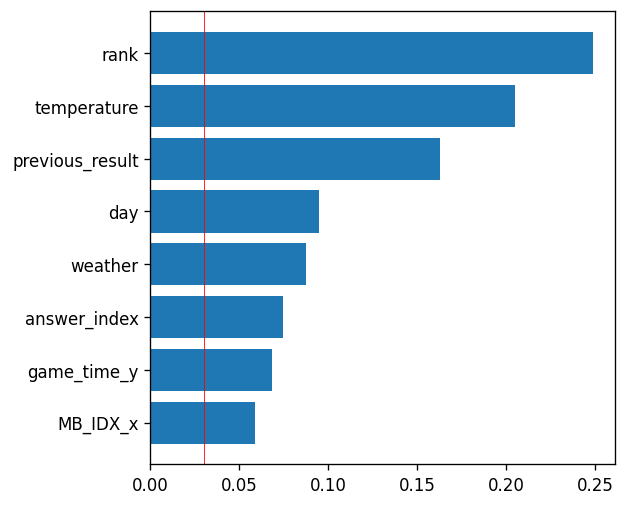

In [39]:
import matplotlib.pyplot as plt

feature_importances = list(
    zip(X_train.columns, pipe.named_steps["xgbclassifier"].feature_importances_)
)
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

plt.figure(figsize=(5, 5), dpi=120)

plt.barh(*list(zip(*feature_importances[::-1])), alpha = 1)
plt.axvline(0.03, color="red", linewidth=0.5);

In [40]:
score = pipe.score(X_test, y_test)

In [41]:
pi = pd.Series(dtype=float)

n_iter = 10  # 랜덤으로 특성을 섞어 평가 성능을 확인하는 과정을 몇 번 반복할지 결정합니다.
np.random.seed(2) # random seed를 고정하여 반복적으로 아래 코드를 수행해도 같은 결과가 나오게 합니다.

for feature in features:
    X_test_permed = X_test.copy()

    # 모델을 재학습하지 않고, 기존 모델에서 feature 값을 여러 번(n_iter) 섞고 검증하여 평균 성능을 확인합니다.
    scores_permutated = []
    for _ in range(n_iter):
        X_test_permed[feature] = np.random.permutation(X_test_permed[feature])
        scores_permutated.append(pipe.score(X_test_permed, y_test))
    avg_score_permutated = np.mean(scores_permutated)
    print(f"Perm {feature} :: 검증 정확도 {avg_score_permutated:.6f}")

    # permutation importance는 해당 특성을 랜덤으로 섞었을 때의 성능 하락폭으로 정의됩니다.
    pi[feature] = score - avg_score_permutated

Perm game_time_y :: 검증 정확도 0.800354
Perm MB_IDX_x :: 검증 정확도 0.815400
Perm answer_index :: 검증 정확도 0.805446
Perm day :: 검증 정확도 0.817309
Perm previous_result :: 검증 정확도 0.774593
Perm weather :: 검증 정확도 0.817910
Perm temperature :: 검증 정확도 0.690117
Perm rank :: 검증 정확도 0.586086


Text(0.5, 1.0, 'Permutation Importance')

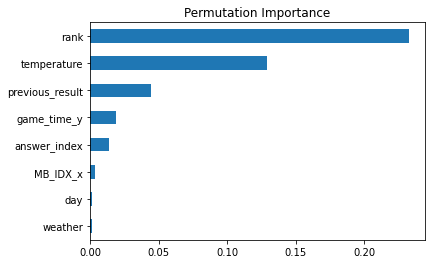

In [42]:
pi.sort_values().plot.barh()
plt.title("Permutation Importance")

In [43]:
pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.0/34.0 MB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=4df1cf2a93c70248a3d9244d3d767d015ad6ca0ee9b180cd251163ad5bdc817d
  Stored in directory: /root/.cache/pip/wheels/35/fb/ef/a08dd2a1611435285fa3f9d9104bf554f10c2eb7293b526ccb
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp38-cp38-linux_x86_64.whl size=12090065 sha256=a98f715408b6419a5b26ca415454e93e54daa5011bca7d4ff8c2f35f6d8f6c52
  Stored in directory: /root/.cache/pip/wheels/85/86/f1/054e7477b5e68f3c4a1258d12ae1c2205d6889283ce631dfe5
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=

In [44]:
!pip3 install eli5
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 14.1 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=9cd86065775d8e99d2e4582f46fd5526c58d9472cf1a42eb952a2a13f8951bac
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib

In [45]:
!pip install category_encoders
!pip3 install pdpbox
!pip3 install xgboost==1.7.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 5.2 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [46]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

In [47]:
from category_encoders import OrdinalEncoder
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier

encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)  # 학습데이터
X_val_encoded = encoder.transform(X_val)  # 검증데이터

boosting = XGBClassifier(
    n_estimators=200,
    n_jobs=-1,
    eval_metric="auc",
    objective="binary:logistic",  # default
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=8,
    use_label_encoder=False,
    subsample=0.8,
    scale_pos_weight = 1,
    colsample_bytree=0.6,

)

eval_set = [(X_train_encoded, y_train), (X_val_encoded, y_val)]

boosting.fit(X_train_encoded, y_train, eval_set=eval_set, early_stopping_rounds=50)

[0]	validation_0-auc:0.600002	validation_1-auc:0.589445
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.657626	validation_1-auc:0.648549
[2]	validation_0-auc:0.726922	validation_1-auc:0.715772
[3]	validation_0-auc:0.724235	validation_1-auc:0.711094
[4]	validation_0-auc:0.72731	validation_1-auc:0.709829
[5]	validation_0-auc:0.723413	validation_1-auc:0.705785
[6]	validation_0-auc:0.738175	validation_1-auc:0.721226
[7]	validation_0-auc:0.751631	validation_1-auc:0.7335
[8]	validation_0-auc:0.754424	validation_1-auc:0.738898
[9]	validation_0-auc:0.753976	validation_1-auc:0.740017
[10]	validation_0-auc:0.753926	validation_1-auc:0.739929
[11]	validation_0-auc:0.758884	validation_1-auc:0.743466
[12]	validation_0-auc:0.761156	validation_1-auc:0.744039
[13]	validation_0-auc:0.761095	validation_1-auc:0.744179
[14]	validation_0-auc:0.765284	validation_1-auc:0.747554
[

XGBClassifier(colsample_bytree=0.6, eval_metric='auc', max_depth=6,
              min_child_weight=8, n_estimators=200, n_jobs=-1, subsample=0.8,
              use_label_encoder=False)

In [48]:
X_train.columns

Index(['game_time_y', 'MB_IDX_x', 'answer_index', 'day', 'previous_result',
       'weather', 'temperature', 'rank'],
      dtype='object')

In [49]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot


In [50]:

mappings = encoder.mapping
print(mappings)

[{'col': 'game_time_y', 'mapping': 19:00    1
20:00    2
16:30    3
14:00    4
19:30    5
NaN     -2
dtype: int64, 'data_type': dtype('O')}, {'col': 'MB_IDX_x', 'mapping': 145034.0       1
151455.0       2
108678.0       3
106176.0       4
135070.0       5
            ... 
129228.0    1479
140915.0    1480
103044.0    1481
142998.0    1482
NaN           -2
Length: 1483, dtype: int64, 'data_type': dtype('O')}, {'col': 'day', 'mapping': 3.0    1
6.0    2
7.0    3
2.0    4
5.0    5
NaN   -2
dtype: int64, 'data_type': dtype('O')}, {'col': 'previous_result', 'mapping': 1.0    1
2.0    2
0.0    3
NaN    4
dtype: int64, 'data_type': dtype('O')}, {'col': 'weather', 'mapping': 2.0    1
1.0    2
0.0    3
NaN   -2
dtype: int64, 'data_type': dtype('O')}, {'col': 'temperature', 'mapping':  25.3     1
 21.4     2
 15.2     3
 24.4     4
 6.8      5
 11.1     6
 29.0     7
 16.7     8
 10.0     9
 17.4    10
 25.1    11
 4.1     12
 22.9    13
 16.3    14
 24.6    15
 20.0    16
 19.6    17
-1.7     

In [51]:
target_feature = "rank"

In [52]:
mapping_data = list(filter(lambda x: x["col"] == target_feature, mappings))
print(mapping_data)

[{'col': 'rank', 'mapping': 5.0    1
3.0    2
4.0    3
2.0    4
NaN    5
7.0    6
6.0    7
dtype: int64, 'data_type': dtype('O')}]


In [53]:
maps = mapping_data[0]["mapping"]
print(type(maps))
print(maps)

<class 'pandas.core.series.Series'>
5.0    1
3.0    2
4.0    3
2.0    4
NaN    5
7.0    6
6.0    7
dtype: int64


In [54]:
pdp_dist = pdp_isolate(
    model=boosting,
    dataset=X_val_encoded,
    model_features=X_val.columns,
    feature=target_feature,
    cust_grid_points=[1,2,3,4,5,6,7],  # 특성값을 찍어 볼 지점을 직접 지정할 수 있습니다.
)
pdp_plot(pdp_dist, target_feature)

NameError: ignored

In [ ]:
encoded_features = maps.values.tolist()
original_features = maps.index.tolist()
print(encoded_features, original_features)

In [ ]:
pdp_plot(pdp_dist, target_feature)
plt.xticks(encoded_features, original_features, rotation=90)

In [ ]:
target_features = ["rank", "temperature"]

interaction = pdp_interact(
    model=boosting,
    dataset=X_val_encoded,
    model_features=X_val_encoded.columns,
    features=target_features,
    cust_grid_points=[
        [1,2,3,4,5,6,7],  # 첫 번째 특성인 marital-status에 대해서는 grid point를 지정해 주고,
        [1,4,7,10,13,16,19,21,24,27,30]  # 두 번째 특성인 age에 대해서는 자동 생성되는 grid point를 사용합니다.
    ],
)

axes = pdp_interact_plot(interaction, plot_type="grid", feature_names=target_features)
plot_params={'xticks':[encoded_features, original_features]}

In [ ]:
target_features = ["rank", "previous_result"]

interaction = pdp_interact(
    model=boosting,
    dataset=X_val_encoded,
    model_features=X_val_encoded.columns,
    features=target_features,
    cust_grid_points=[
        [1,2,3,4,5,6,7],  # 첫 번째 특성인 marital-status에 대해서는 grid point를 지정해 주고,
        [0,1,2]  # 두 번째 특성인 age에 대해서는 자동 생성되는 grid point를 사용합니다.
    ],
)

axes = pdp_interact_plot(interaction, plot_type="grid", feature_names=target_features)
plot_params={'xticks':[encoded_features, original_features]}

In [ ]:
cfedit.head(3)

In [ ]:
ppm

In [ ]:
final.columns

In [ ]:
premi = final[['idx', 'game_date', 'game_time_y', 'MB_IDX_x', 'answer_index','day', 'previous_result', 'weather', 'temperature','product_grade_name','cancel_yn','Rank']]

In [ ]:
premi.product_grade_name.value_counts().head(20)

In [ ]:
premi['premium'] = np.where(premi['product_grade_name'] =='S석', 0, 
                np.where(premi['product_grade_name'] == 'Exciting석', 0,
                np.where(premi['product_grade_name'] == 'World class석', 0,
                np.where(premi['product_grade_name'] == 'With석', 0,
                np.where(premi['product_grade_name'] == 'Expert석', 0,
                np.where(premi['product_grade_name'] == 'Wide view석', 0,
                np.where(premi['product_grade_name'] == '원정석', 0,
                np.where(premi['product_grade_name'] == 'N석', 0, 1))))))))

In [ ]:
premie=premi.dropna(subset=['product_grade_name'])
premie.premium.value_counts()

In [ ]:
premie.cancel_yn.value_counts()

In [ ]:
premied=premie[premie['cancel_yn']=='N']
premied.premium.value_counts()

In [ ]:
premied.columns

In [ ]:
premied[['game_date', 'game_time_y', 'MB_IDX_x',
        'day', 'previous_result', 'weather',
       'temperature', 'Rank']] = premied[['game_date', 'game_time_y', 'MB_IDX_x', 
        'day', 'previous_result', 'weather',
       'temperature', 'Rank']].astype('object')

In [ ]:
features = ['game_date', 'game_time_y', 'MB_IDX_x',
        'day', 'previous_result', 'weather',
       'temperature', 'Rank']
target = 'premium'

In [ ]:
train, test = train_test_split(premied, test_size = 0.2, stratify = premied['premium'],random_state = 42)
train, val = train_test_split(train, test_size = 0.2, stratify = train['premium'],random_state = 42)
print("train set:", train.shape)
print("val set:", val.shape)
print("test set:", test.shape)

In [ ]:
from xgboost import XGBClassifier
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="median"),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        max_depth=6,
        min_child_weight=8,
        colsample_bytree=0.6,
        learning_rate=0.1,
        subsample = 0.8,
        use_label_encoder=False,
        scale_pos_weight = 1
    ),
)

pipe.fit(X_train, y_train)
pipe.score(X_val, y_val)
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
    

In [ ]:
import matplotlib.pyplot as plt

feature_importances = list(
    zip(X_train.columns, pipe.named_steps["xgbclassifier"].feature_importances_)
)
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

plt.figure(figsize=(5, 5), dpi=120)

plt.barh(*list(zip(*feature_importances[::-1])), alpha = 1)


In [ ]:
premied['count'] = 1

In [ ]:
preme = premied.groupby(['Rank','premium'])[['count']].sum().sort_values(by='Rank', ascending=True).reset_index()
preme

In [ ]:
import pandas as pd

General = [2267, 609, 7015, 1913, 22, 57]
Premium = [398, 30, 801, 204, 2, 3]
rank = ['2', '3', '4', '5', '6', '7']

df = pd.DataFrame({'General' : General, 'Premium' : Premium}, index = rank)
df

In [ ]:
df['mean'] = df['General'] + df['Premium']
df['mean'] = df['Premium']/df['mean']
df

In [ ]:
df['mean'].plot.bar(alpha=0.5)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(6)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, df['General'], bar_width, alpha=0.5, color='skyblue', label='General')

b2 = plt.bar(index + bar_width, df['Premium'], bar_width, alpha=0.9, color='skyblue', label='Premium')


# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 6+ bar_width, 1), rank)

# x축, y축 이름 및 범례 설정
plt.xlabel('rank', size = 13)
plt.ylabel('count', size = 13)
plt.legend()
plt.show()

In [ ]:
ppre = premied.groupby(['previous_result','premium'])[['count']].sum().sort_values(by='previous_result', ascending=True).reset_index()
ppre

In [ ]:
import pandas as pd

General = [4821,3063,3933]
Premium = [669,308,451]
result = ['0', '1', '2']

df2 = pd.DataFrame({'General' : General, 'Premium' : Premium}, index = result)
df2

In [ ]:
df2['mean'] = df2['General'] + df2['Premium']
df2['mean'] = df2['Premium']/df2['mean']
df2

In [ ]:
df2['mean'].plot.bar(alpha=0.5)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(3)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, df2['General'], bar_width, alpha=0.5, color='skyblue', label='General')

b2 = plt.bar(index + bar_width, df2['Premium'], bar_width, alpha=0.9, color='skyblue', label='Premium')


# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 0+ bar_width, 1), rank)

# x축, y축 이름 및 범례 설정
plt.xlabel('result', size = 13)
plt.ylabel('count', size = 13)
plt.legend()
plt.show()

In [ ]:
cfedit['count'] =1
cfedit.columns

In [ ]:
c1 = cfedit[cfedit['participant']==0]

In [ ]:
c2=c1.groupby(['rank'])[['count']].sum().sort_values(by='rank', ascending=True).reset_index()
c2

In [ ]:
c2['count'].plot.bar()

In [ ]:
c2['value_count'] = [23, 6, 54, 25, 1, 1]
c2##

In [ ]:
c2['mean'] = c2['count']/c2['value_count']
c2

In [ ]:
c2['mean'].plot.bar()

In [ ]:
c3=c1.groupby(['previous_result'])[['count']].sum().sort_values(by='previous_result', ascending=True).reset_index()
c3['value_count'] = [7,5,6]
c3['mean'] = c3['count']/c3['value_count']
c3

In [ ]:
c3['count'].plot.bar()

In [ ]:
c3['mean'].plot.bar()

In [ ]:
a00=cfedit.groupby(['answer_index', 'participant'])[['count']].sum().sort_values(by='answer_index', ascending=True).reset_index()
a0 = a00[a00['participant']==0]
a1 = a00[a00['participant']==1]

In [ ]:
a00.head(3)

In [ ]:
a0['count'].sum()

In [ ]:
a1['count'].sum()

In [ ]:
a01 =pd.merge(a0, a1, how='inner', on='answer_index')
a012 = a01[['answer_index', 'count_x', 'count_y']]
a012

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(15)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, a012['count_x'], bar_width, alpha=0.5, color='blue', label='participant')

b2 = plt.bar(index + bar_width, a012['count_y'], bar_width, alpha=0.5, color='red', label='Non_participant')


# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 0+ bar_width, 1), rank)

# x축, y축 이름 및 범례 설정
plt.xlabel('anwer_score', size = 13)
plt.ylabel('count', size = 13)
plt.legend()
plt.show()

In [ ]:
b00=cfedit.groupby(['participant'])[['answer_index']].mean().sort_values(by='answer_index', ascending=True).reset_index()
b00

In [ ]:
pro = final[['ticket_no', 'product_grade_name', 'product_denomination_name', 'cancel_yn']]
pro

In [ ]:
pro=pro.drop_duplicates()
pro

In [ ]:
fn2 = final[['idx', 'game_date', 'game_time_y', 'MB_IDX_x','product_grade_name','product_denomination_name', 'cancel_yn','Rank']]
fn2.columns

In [ ]:
final['product_denomination_name'] = final['product_denomination_name'].fillna('None')

In [ ]:
final.loc[final['product_denomination_name'].str.contains('예매권북'), 'benefit'] = 3000
final.loc[final['product_denomination_name'].str.contains('5천원'), 'benefit'] = 5000
final.loc[final['product_denomination_name'].str.contains('5,000'), 'benefit'] = 5000
final.loc[final['product_denomination_name'].str.contains('3,000'), 'benefit'] = 3000
final.loc[final['product_denomination_name'].str.contains('1,000'), 'benefit'] = 1000
final.loc[final['product_denomination_name'].str.contains('문화누리카드'), 'benefit'] = '40%'
final.loc[final['product_denomination_name'].str.contains('축덕카드(신용)'), 'benefit'] = 5000
final.loc[final['product_denomination_name'].str.contains('축덕카드(체크)'), 'benefit'] = 3000
final.loc[final['product_denomination_name'].str.contains('1인 테이블석 50%'), 'benefit'] = '50%'
final.loc[final['product_denomination_name'].str.contains('프리미엄 골드석'), 'benefit'] = '50%'
final.loc[final['product_denomination_name'].str.contains('1인 테이블석 할인권'), 'benefit'] = '30%'
final.loc[final['product_denomination_name'].str.contains('ㅅㅇ전 게임권'), 'benefit'] = '30%'
final.loc[final['product_denomination_name'].str.contains('포스코'), 'benefit'] = '10%'

In [ ]:
final['count'] = 1

In [ ]:
final.loc[final['product_denomination_name'].str.contains('일반'), 'promotion'] = 0
final.loc[final['product_denomination_name'].str.contains('청소년/어린이'), 'promotion'] = 0
final.loc[final['product_denomination_name'].str.contains('성인'), 'promotion'] = 0
final.loc[final['product_denomination_name'].str.contains('예매권북'), 'promotion'] = 1
final.loc[final['product_denomination_name'].str.contains('5천원'), 'promotion'] = 1
final.loc[final['product_denomination_name'].str.contains('5,000'), 'promotion'] = 1
final.loc[final['product_denomination_name'].str.contains('3,000'), 'promotion'] = 1
final.loc[final['product_denomination_name'].str.contains('1,000'), 'promotion'] = 1
final.loc[final['product_denomination_name'].str.contains('문화누리카드'), 'promotion'] = 1
final.loc[final['product_denomination_name'].str.contains('축덕카드(신용)'), 'promotion'] = 1
final.loc[final['product_denomination_name'].str.contains('축덕카드(체크)'), 'promotion'] = 1
final.loc[final['product_denomination_name'].str.contains('1인 테이블석 50%'), 'promotion'] = 1
final.loc[final['product_denomination_name'].str.contains('프리미엄 골드석'), 'promotion'] =1
final.loc[final['product_denomination_name'].str.contains('1인 테이블석 할인권'), 'promotion'] = 1
final.loc[final['product_denomination_name'].str.contains('ㅅㅇ전 게임권'), 'promotion'] = 1
final.loc[final['product_denomination_name'].str.contains('포스코'), 'promotion'] = 1
final.loc[final['product_denomination_name'].str.contains('게임권'), 'promotion'] = 1
final.loc[final['product_denomination_name'].str.contains('셀트리온 예매권'), 'promotion'] = 1
final.loc[final['product_denomination_name'].str.contains('N회 방문자'), 'promotion'] = 1

In [ ]:
final['premium'] = np.where(final['product_grade_name'] =='S석', 0, 
                np.where(final['product_grade_name'] == 'Exciting석', 0,
                np.where(final['product_grade_name'] == 'World class석', 0,
                np.where(final['product_grade_name'] == 'With석', 0,
                np.where(final['product_grade_name'] == 'Expert석', 0,
                np.where(final['product_grade_name'] == 'Wide view석', 0,
                np.where(final['product_grade_name'] == '원정석', 0,
                np.where(final['product_grade_name'] == 'N석', 0, 1))))))))

In [ ]:
final['product_grade_name'] = final.product_grade_name.str.replace('석E', '석(E', regex = True)

In [ ]:
fnn = final[final['cancel_yn']=='N']
fn3 = fnn[['idx', 'game_date','MB_IDX_x', 'answer_index', 'previous_result','weather', 'temperature','reserve_detail_no','product_grade_name', 'product_denomination_name','Rank', 'benefit', 'count', 'promotion', 'premium']]
fn3['benefit']= fn3['benefit'].fillna(0)
fn3

In [ ]:
fn4=fn3.groupby(['Rank', 'promotion'])[['count']].sum().reset_index()
fn0 =fn4[fn4['promotion']==0.0]
fn0['value_count'] = [23, 6, 54, 25, 1, 1]
fn0['mean'] = fn0['count']/fn0['value_count']
fn0

In [ ]:
fn1 =fn4[fn4['promotion']==1.0]
fn1['value_count'] = [23, 6, 54, 25, 1, 1]
fn1['mean'] = fn1['count']/fn1['value_count']
fn1

In [ ]:
fnm = pd.merge(fn0, fn1, how='inner', on='Rank')
fnm['sum'] = fnm['mean_x'] + fnm['mean_y']
fnm['x_mean'] = fnm['mean_x']/fnm['sum']
fnm['y_mean'] = fnm['mean_y']/fnm['sum']
fnm


In [ ]:
fnm[[ 'count_y','count_x']].plot(kind='bar', alpha = 0.7)

In [ ]:
fnm['y_mean'].mean()

In [ ]:
fnm[['y_mean','x_mean']].plot(kind='bar', alpha = 0.7,legend = False, stacked=True)
plt.axhline(fnm['y_mean'].mean(), color="red", linewidth=0.5);

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(6)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, fnm['mean_x'], bar_width, alpha=0.7, color='skyblue', label='General')

b2 = plt.bar(index + bar_width, fnm['mean_y'], bar_width, alpha=0.5, color='blue', label='Promotion')


# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 0+ bar_width, 1), rank)

# x축, y축 이름 및 범례 설정
plt.xlabel('rank', size = 13)
plt.ylabel('mean', size = 13)
plt.legend()
plt.show()

In [ ]:
fn5=fn3.groupby(['previous_result', 'promotion'])[['count']].sum().reset_index()
fn50 =fn5[fn5['promotion']==0.0]
fn51 =fn5[fn5['promotion']==1.0]
fn50['value_count'] = [7,5,6]
fn50['mean'] = fn50['count']/fn50['value_count']
fn51['value_count'] = [7,5,6]
fn51['mean'] = fn51['count']/fn51['value_count']



In [ ]:
fn55 = pd.merge(fn50, fn51, how='inner', on='previous_result')
fn55
fn55['sum'] = fn55['mean_x'] + fn55['mean_y']
fn55['x_mean'] = fn55['mean_x']/fn55['sum']
fn55['y_mean'] = fn55['mean_y']/fn55['sum']
fn55

In [ ]:
fn55[['count_y','count_x']].plot(kind='bar', alpha = 0.7)

In [ ]:
fn55['y_mean'].mean()

In [ ]:
fn55[[ 'y_mean','x_mean']].plot(kind='bar', alpha = 0.7,legend = False, stacked=True)
plt.axhline(fn55['y_mean'].mean(), color="red", linewidth=0.5);

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(3)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, fn55['count_x'], bar_width, alpha=1, color='skyblue', label='General')

b2 = plt.bar(index + bar_width, fn55['count_y'], bar_width, alpha=0.8, color='orange', label='Promotion')


# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 0+ bar_width, 1), rank)

# x축, y축 이름 및 범례 설정
plt.xlabel('previous_result', size = 13)
plt.ylabel('count', size = 13)
plt.legend()
plt.show()

In [ ]:
fn6=fn3.groupby(['premium','product_grade_name','promotion'])[['count']].sum().reset_index()
fn60 = fn6[fn6['premium']==0]
fn61 = fn6[fn6['premium']==1]

In [ ]:
fn600 = fn60[fn60['promotion']==0]
fn601 = fn60[fn60['promotion']==1]
fn600m = pd.merge(fn600, fn601, how='inner', on='product_grade_name')
fn600m['sum'] = fn600m['count_x'] + fn600m['count_y']
fn600m['mean_0'] = fn600m['count_x']/fn600m['sum']
fn600m['mean_1'] = fn600m['count_y']/fn600m['sum']
fn600m['count_y'].sum()/fn600m['sum'].sum()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(7)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, fn600m['count_x'], bar_width, alpha=0.7, color='skyblue', label='General')

b2 = plt.bar(index + bar_width, fn600m['count_y'], bar_width, alpha=0.5, color='blue', label='Promotion')


# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 0+ bar_width, 1), rank)

# x축, y축 이름 및 범례 설정
plt.xlabel('product_grade', size = 13)
plt.ylabel('count', size = 13)
plt.legend()
plt.show()

In [ ]:
fn610 = fn61[fn61['promotion']==0]
fn611 = fn61[fn61['promotion']==1]
fn610m = pd.merge(fn610, fn611, how='inner', on='product_grade_name')
fn610m['sum'] = fn610m['count_x'] + fn610m['count_y']
fn610m['mean_0'] = fn610m['count_x']/fn610m['sum']
fn610m['mean_1'] = fn610m['count_y']/fn610m['sum']
fn610m['count_y'].sum()/fn610m['sum'].sum()

In [ ]:
fn600m

In [ ]:
fn600m[['count_y','count_x']].plot(kind='bar', alpha = 0.7)

In [ ]:
fn600m['mean_1'].mean()

In [ ]:
fn600m[[ 'mean_1','mean_0']].plot(kind='bar', alpha = 0.7,legend = False, stacked=True)
plt.axhline(fn600m['mean_1'].mean(), color="red", linewidth=0.5);

In [ ]:
fn610m[['count_y','count_x']].plot(kind='bar', alpha = 0.7)

In [ ]:
fn610m['mean_1'].mean()

In [ ]:
fn610m[[ 'mean_1','mean_0']].plot(kind='bar', alpha = 0.7,legend = False, stacked=True)
plt.axhline(fn610m['mean_1'].mean(), color="red", linewidth=0.5);

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(11)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, fn610m['count_x'], bar_width, alpha=0.7, color='skyblue', label='General')

b2 = plt.bar(index + bar_width, fn610m['count_y'], bar_width, alpha=0.5, color='blue', label='Promotion')


# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 0+ bar_width, 1), rank)

# x축, y축 이름 및 범례 설정
plt.xlabel('product_grade', size = 13)
plt.ylabel('count', size = 13)
plt.legend()
plt.show()

In [ ]:
fn3.columns

In [ ]:
fn7=fn3.groupby(['premium','promotion','product_denomination_name'])[['count']].sum().reset_index()
fn70 = fn7[fn7['premium']==0]
fn71 = fn7[fn7['premium']==1]

In [ ]:
fn701 = fn70[fn70['promotion']==1]
fn711 = fn71[fn71['promotion']==1]

In [ ]:
fn701=fn701.sort_values(by='count', ascending=False)
fn711=fn711.sort_values(by='count', ascending=False)

In [ ]:
fn70['count'].sum()

In [ ]:
fn701

In [ ]:
fn701['count'].plot.bar()

In [ ]:
fn711

In [ ]:
fn711['count'].plot.bar()

In [ ]:
fn8=fn3.groupby(['Rank','promotion','benefit'])[['count']].sum().reset_index()
fn8.head(50)

In [ ]:
fn9=fn3.groupby(['Rank','premium'])[['count']].sum().reset_index()
fn90 = fn9[fn9['premium']==0]
fn91= fn9[fn9['premium']==1]
fn9m = pd.merge(fn90, fn91, how='inner', on='Rank')
fn9m['value_count'] = [23, 6, 54, 25, 1, 1]
fn9m

In [ ]:
fn9m['mean_x'] = fn9m['count_x']/fn9m['value_count']
fn9m['mean_y'] = fn9m['count_y']/fn9m['value_count']
fn9m['sum'] = fn9m['mean_x']+ fn9m['mean_y']
fn9m['x_mean'] = fn9m['mean_x']/fn9m['sum']
fn9m['y_mean'] = fn9m['mean_y']/fn9m['sum']
fn9m

In [ ]:
fn9m[[ 'y_mean', 'x_mean']].plot(kind='bar', alpha = 0.7,legend = False, stacked=True)

In [ ]:
fn10=fn3.groupby(['game_date','premium'])[['count']].sum().reset_index()
fn100 = fn10[fn10['premium']==0]
fn101= fn10[fn10['premium']==1]
fn10m = pd.merge(fn100, fn101, how='inner', on='game_date')
fn10m['sum'] = fn10m['count_x'] + fn10m['count_y']
fn10m['mean_0'] = fn10m['count_x']/fn10m['sum']
fn10m['mean_1'] = fn10m['count_y']/fn10m['sum']
fn10m

In [ ]:
fn10m['mean_1']>fn10m['mean_1'].mean()

In [ ]:
fn10m[['count_y','count_x']].plot(kind='bar', alpha = 0.7,legend = False, stacked=True)
plt.axhline(fn10m['sum'].mean(), color="red", linewidth=0.5)

In [ ]:
fn10m[['mean_1','mean_0']].plot(kind='bar', alpha = 0.7,legend = False, stacked=True)
plt.axhline(fn10m['mean_1'].mean(), color="red", linewidth=0.5)

In [ ]:
n1 = fn3.groupby(['promotion', 'benefit'])[['count']].sum().reset_index()
n2= n1[n1['promotion']==1.0].sort_values(by='count', ascending=False)

In [ ]:
n2

In [ ]:
fn12=fn3.groupby(['previous_result','promotion','benefit'])[['count']].sum().reset_index()
fn121 =fn12[fn12['promotion']==1.0]
fn120 =fn121[fn121['previous_result']==0]
fn1211 =fn121[fn121['previous_result']==1]
fn122 =fn121[fn121['previous_result']==2]


In [ ]:
fn122.sort_values(by='count', ascending=False)

In [ ]:
colors = ['#eeeee4', '#eeeee4', '#01579B','#0288D1', '#eeeee4', '#eeeee4', '#eeeee4']
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05,0.05]
fn122['count'].plot.pie(startangle=245,  explode=explode, colors=colors,autopct = '%.1f%%')

In [ ]:
fn1211.sort_values(by='count', ascending=False)

In [ ]:
fn122.sort_values(by='count', ascending=False)

In [ ]:
fn13=fn3.groupby(['premium','promotion','product_denomination_name'])[['count']].sum().reset_index()
fn130 = fn13[fn13['premium']==0]
fn131 = fn13[fn13['premium']==1]
fn130 = fn130[fn130['promotion']==1]
fn131 = fn131[fn131['promotion']==1]

In [ ]:
fn130 = fn130.sort_values(by='count', ascending=False)
fn130

In [ ]:
fn130['count'].plot.bar()

In [ ]:
fn131=fn131.sort_values(by='count', ascending=False)
fn131

In [ ]:
fn131['count'].plot.bar()

In [ ]:
df6 = pd.read_csv('/content/drive/MyDrive/schedule2022120221019212245.csv')
df6au=df6[['game_date', 'home_team_name','audience']]
df6au=df6au[df6au['home_team_name']=='인천']
df6au['audience'].plot.bar()
plt.axhline(df6au['audience'].mean(), color="red", linewidth=0.5);

In [ ]:
fn14=fn3.groupby(['Rank', 'premium'])[['count']].sum().reset_index()
fn140 = fn14[fn14['premium']==0]
fn141 = fn14[fn14['premium']==1]
fn14m = pd.merge(fn140, fn141, how='inner', on='Rank')
fn14m['sum'] = fn14m['count_x']+fn14m['count_y']
fn14m['mean_x'] = fn14m['count_x']/fn14m['sum']
fn14m['mean_y'] = fn14m['count_y']/fn14m['sum']
fn14m

In [ ]:
a11 = pd.read_csv('/content/drive/MyDrive/a11.csv')

In [ ]:
a11s = a11[a11['category']=='좌석']
a11s.rename(columns = {'answer_index' : 'sitting_index'}, inplace=True)
a11s['date'] = a11s.date.str.replace('/', '-', regex = True)
a11s

a11t = a11[a11['category']=='티켓']
a11t.rename(columns = {'answer_index' : 'ticket_index'}, inplace=True)
a11t['date'] = a11t.date.str.replace('/', '-', regex = True)
a11t

a11p = a11[a11['category']=='특성화']
a11p.rename(columns = {'answer_index' : 'premium_index'}, inplace=True)
a11p['date'] = a11p.date.str.replace('/', '-', regex = True)
a11p

a11m = a11[a11['category']=='MD샵']
a11m.rename(columns = {'answer_index' : 'md_index'}, inplace=True)
a11m['date'] = a11p.date.str.replace('/', '-', regex = True)
a11m

a11g = a11[a11['category']=='게이트 운영']
a11g.rename(columns = {'answer_index' : 'gate_index'}, inplace=True)
a11g['date'] = a11p.date.str.replace('/', '-', regex = True)
a11g

In [ ]:
a11s = a11s.groupby(['MB_IDX','date'])[['sitting_index']].sum().reset_index()
cols = ['MB_IDX', 'date']
a11s['Mg'] =a11s[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
a11s=a11s[['Mg', 'sitting_index']]

a11t = a11t.groupby(['MB_IDX','date'])[['ticket_index']].sum().reset_index()
cols = ['MB_IDX', 'date']
a11t['Mg'] =a11t[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
a11t=a11t[['Mg', 'ticket_index']]

a11p = a11p.groupby(['MB_IDX','date'])[['premium_index']].sum().reset_index()
cols = ['MB_IDX', 'date']
a11p['Mg'] =a11p[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
a11p=a11p[['Mg', 'premium_index']]

a11m = a11m.groupby(['MB_IDX','date'])[['md_index']].sum().reset_index()
cols = ['MB_IDX', 'date']
a11m['Mg'] =a11m[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
a11m=a11m[['Mg', 'md_index']]

a11g = a11g.groupby(['MB_IDX','date'])[['gate_index']].sum().reset_index()
cols = ['MB_IDX', 'date']
a11g['Mg'] =a11g[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
a11g=a11g[['Mg', 'gate_index']]

In [ ]:
final.columns

In [ ]:
cols = ['MB_IDX_x', 'game_date']
final['Mg'] =final[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
final.head(3)

In [ ]:
a11.MB_IDX.nunique()

In [ ]:
fi = final[['Mg','MB_IDX_x', 'game_date', 'game_time_y', 'survey_participant', 'participant','day', 'previous_result', 'weather','temperature', 'product_grade_name', 'product_denomination_name', 'Rank', 'benefit','count', 'promotion', 'premium']]
ance = pd.merge(fi, a11s, how='outer', on='Mg')
ance = pd.merge(ance, a11t, how='outer', on='Mg')
ance =pd.merge(ance, a11p, how='outer', on='Mg')
ance = pd.merge(ance, a11m, how='outer', on='Mg')
ance = pd.merge(ance, a11g, how='outer', on='Mg')

In [ ]:
ance.to_csv('ance.csv', index=False)

In [ ]:
ance.columns

In [ ]:
ance1 = ance[['MB_IDX_x', 'game_date', 'sitting_index', 'product_grade_name', 'premium']]
ance1['count'] = 1
ance2 = ance[['MB_IDX_x', 'game_date', 'ticket_index', 'product_grade_name', 'product_denomination_name','benefit','premium']]
ance2['count'] = 1
ance3 = ance[['MB_IDX_x', 'game_date', 'premium_index', 'product_grade_name', 'product_denomination_name','premium']]
ance3['count'] = 1

In [ ]:
ance1g=ance1.groupby(['sitting_index','product_grade_name'])[['count']].sum().reset_index()
ance10 = ance1g[ance1g['sitting_index']==0]
ance11 = ance1g[ance1g['sitting_index']==1]
ance12 = ance1g[ance1g['sitting_index']==2]
ance13 = ance1g[ance1g['sitting_index']==3]
ance14 = ance1g[ance1g['sitting_index']==4]

ance2g=ance2.groupby(['ticket_index','benefit'])[['count']].sum().reset_index()
ance20 = ance2g[ance2g['ticket_index']==0]
ance21 = ance2g[ance2g['ticket_index']==1]
ance22 = ance2g[ance2g['ticket_index']==2]
ance23 = ance2g[ance2g['ticket_index']==3]
ance24 = ance2g[ance2g['ticket_index']==4]

ance3g=ance3.groupby(['premium_index','product_grade_name'])[['count']].sum().reset_index()
ance30 = ance3g[ance3g['premium_index']==0]
ance31 = ance3g[ance3g['premium_index']==1]
ance32 = ance3g[ance3g['premium_index']==2]
ance33 = ance3g[ance3g['premium_index']==3]
ance34 = ance3g[ance3g['premium_index']==4]

ance10['count'].plot.bar()

In [ ]:
ance10.rename(columns = {'count' : 'count_0'}, inplace=True)
ance11.rename(columns = {'count' : 'count_1'}, inplace=True)
ance12.rename(columns = {'count' : 'count_2'}, inplace=True)
ance13.rename(columns = {'count' : 'count_3'}, inplace=True)
ance14.rename(columns = {'count' : 'count_4'}, inplace=True)

ance20.rename(columns = {'count' : 'count_0'}, inplace=True)
ance21.rename(columns = {'count' : 'count_1'}, inplace=True)
ance22.rename(columns = {'count' : 'count_2'}, inplace=True)
ance23.rename(columns = {'count' : 'count_3'}, inplace=True)
ance24.rename(columns = {'count' : 'count_4'}, inplace=True)

ance30.rename(columns = {'count' : 'count_0'}, inplace=True)
ance31.rename(columns = {'count' : 'count_1'}, inplace=True)
ance32.rename(columns = {'count' : 'count_2'}, inplace=True)
ance33.rename(columns = {'count' : 'count_3'}, inplace=True)
ance34.rename(columns = {'count' : 'count_4'}, inplace=True)

In [ ]:
ance100 =pd.merge(ance10, ance11, how='outer', on='product_grade_name')
ance120 = pd.merge(ance100, ance12, how='outer', on='product_grade_name')
ance130 = pd.merge(ance120, ance13, how='outer', on='product_grade_name')
ance140 = pd.merge(ance130, ance14, how='outer', on='product_grade_name')
ance140

ance200 =pd.merge(ance20, ance21, how='outer', on='benefit')
ance220 = pd.merge(ance200, ance22, how='outer', on='benefit')
ance230 = pd.merge(ance220, ance23, how='outer', on='benefit')
ance240 = pd.merge(ance230, ance24, how='outer', on='benefit')
ance240

ance300 =pd.merge(ance30, ance31, how='outer', on='product_grade_name')
ance320 = pd.merge(ance300, ance32, how='outer', on='product_grade_name')
ance330 = pd.merge(ance320, ance33, how='outer', on='product_grade_name')
ance340 = pd.merge(ance330, ance34, how='outer', on='product_grade_name')
ance340

In [ ]:
ance140['count_0'] = ance140['count_0'].fillna(0)
ance140['count_1'] = ance140['count_1'].fillna(0)
ance140['count_2'] = ance140['count_2'].fillna(0)
ance140['count_3'] = ance140['count_3'].fillna(0)
ance140['count_4'] = ance140['count_4'].fillna(0)

ance240['count_0'] = ance240['count_0'].fillna(0)
ance240['count_1'] = ance240['count_1'].fillna(0)
ance240['count_2'] = ance240['count_2'].fillna(0)
ance240['count_3'] = ance240['count_3'].fillna(0)
ance240['count_4'] = ance240['count_4'].fillna(0)

ance340['count_0'] = ance340['count_0'].fillna(0)
ance340['count_1'] = ance340['count_1'].fillna(0)
ance340['count_2'] = ance340['count_2'].fillna(0)
ance340['count_3'] = ance340['count_3'].fillna(0)
ance340['count_4'] = ance340['count_4'].fillna(0)

In [ ]:
ance140['sum'] = ance140['count_0'] + ance140['count_1'] + ance140['count_2'] + ance140['count_3'] + ance140['count_4']
ance240['sum'] = ance240['count_0'] + ance240['count_1'] + ance240['count_2'] + ance240['count_3'] + ance240['count_4']
ance340['sum'] = ance340['count_0'] + ance340['count_1'] + ance340['count_2'] + ance340['count_3'] + ance340['count_4']
ance140

In [ ]:
ance140['mean_0'] = ance140['count_0']/ance140['sum']
ance140['mean_1'] = ance140['count_1']/ance140['sum']
ance140['mean_2'] = ance140['count_2']/ance140['sum']
ance140['mean_3'] = ance140['count_3']/ance140['sum']
ance140['mean_4'] = ance140['count_4']/ance140['sum']
ance140

ance240['mean_0'] = ance240['count_0']/ance240['sum']
ance240['mean_1'] = ance240['count_1']/ance240['sum']
ance240['mean_2'] = ance240['count_2']/ance240['sum']
ance240['mean_3'] = ance240['count_3']/ance240['sum']
ance240['mean_4'] = ance240['count_4']/ance240['sum']

ance340['mean_0'] = ance340['count_0']/ance340['sum']
ance340['mean_1'] = ance340['count_1']/ance340['sum']
ance340['mean_2'] = ance340['count_2']/ance340['sum']
ance340['mean_3'] = ance340['count_3']/ance340['sum']
ance340['mean_4'] = ance340['count_4']/ance340['sum']

In [ ]:
ance140[['product_grade_name','sum','mean_0', 'mean_1', 'mean_2', 'mean_3', 'mean_4']]

In [ ]:
ance140[['mean_0', 'mean_1', 'mean_2', 'mean_3', 'mean_4']].plot(kind='bar', alpha = 0.7,legend=False, stacked=True)

In [ ]:
ance240

In [ ]:
ance240[['benefit','sum','mean_0', 'mean_1', 'mean_2', 'mean_3', 'mean_4']]

In [ ]:
ance240[['mean_0', 'mean_1', 'mean_2', 'mean_3', 'mean_4']].plot(kind='bar', alpha = 0.7,legend=False, stacked=True)

In [ ]:
ance340[['product_grade_name', 'sum', 'mean_0', 'mean_1', 'mean_2', 'mean_3', 'mean_4']]

In [ ]:
ance340[['mean_0', 'mean_1', 'mean_2', 'mean_3', 'mean_4']].plot(kind='bar', alpha = 0.7,legend=False, stacked=True)

In [ ]:
answer = pd.read_csv('/content/drive/MyDrive/customer_expect_2.csv') 
answer

In [ ]:
cols = ['MB_IDX', 'game_date']
answer['Mg'] =answer[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [ ]:
fi = final[['Mg','MB_IDX_x', 'game_date', 'game_time_y', 'survey_participant', 'participant','day', 'previous_result', 'weather','temperature', 'product_grade_name', 'product_denomination_name', 'Rank', 'benefit','count', 'promotion', 'premium']]
answerm = pd.merge(fi, answer, how='outer', on='Mg')
answerm.to_csv('answerm.csv', index=False)

In [ ]:
answerm.columns

In [ ]:
answer2=answerm[['MB_IDX_x','game_date_x','temperature','product_grade_name','product_denomination_name','Rank','benefit',
       'promotion', 'premium','answer_index']]
answer2.rename(columns = {'game_date_x' : 'game_date'}, inplace=True)
answer2.head(3)

In [ ]:
game_goal = pd.read_csv('/content/drive/MyDrive/game_goal.csv') 
game_goal.head(3)

In [ ]:
answerf = pd.merge(answer2,game_goal, how='outer', on='game_date')
answerf = answerf.drop_duplicates()
answerf.rename(columns = {'total goal' : 'total_goal'}, inplace=True)

In [ ]:
answerf= answerf.dropna(subset=['answer_index'])
answerf.head(3)

In [ ]:
answerf.corr()['answer_index'].sort_values(ascending=False).head(10)

In [ ]:
sns.histplot(answerf['answer_index'], bins=15);

In [ ]:
answerf.columns

In [ ]:
# 범주형 컬럼과 타겟과의 관계
fig = plt.figure()
fig.set_size_inches(24, 12)
(ax1, ax2, ax3), (ax4, ax5, ax6) = fig.subplots(nrows=2, ncols=3)
sns.boxplot(data=answerf, x='weather', y='answer_index', ax=ax1)
ax1.set_title('weather - promotion')
sns.boxplot(data=answerf, x='day', y='answer_index', ax=ax2)
ax2.set_title('answer_index - day')
sns.boxplot(data=answerf, x='Rank',y='answer_index', ax=ax3)
ax3.set_title('answer_index - Rank')

# 수치형 컬럼과 타겟과의 관계
sns.scatterplot(data=answerf, x='audiences', y='answer_index', ax=ax4)
ax4.set_title('answer_index - audiences')
sns.boxplot(data=answerf, x='total_goal', y='answer_index', ax=ax5)
ax5.set_title('SalePrice - total_goal')
sns.boxplot(data=answerf, x='hometeam_goal', y='answer_index', ax=ax6)
ax6.set_title('SalePrice - hometeam_goal')

In [ ]:
answerf.columns

In [ ]:
answerf[['Rank','premium', 'promotion','game_time','game_result','previous_result', 'day', 'weather']] = answerf[['Rank','premium',  'promotion','game_time','game_result','previous_result', 'day', 'weather']].astype('object')

In [ ]:
answerf = answerf.dropna(subset=['answer_index'])
answerf.info()

In [ ]:
from sklearn.model_selection import train_test_split
X = answerf.drop('answer_index', axis=1)
y = answerf['answer_index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index

scaler = StandardScaler()
X_train[numeric_feats] = scaler.fit_transform(X_train[numeric_feats])
X_test[numeric_feats] = scaler.transform(X_test[numeric_feats])

In [ ]:
X_train[numeric_feats].describe().T[['mean', 'std']]

In [ ]:
from category_encoders import OneHotEncoder

ohe = OneHotEncoder()

# 인코딩하는 방법을 눈여겨 보세요.

X_train_ohe = ohe.fit_transform(X_train)
X_test_ohe = ohe.transform(X_test)

In [ ]:
ohe.category_mapping

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

baseline = [y_train.mean()] * len(y_train)
baseline_r2 = r2_score(y_train, baseline)
baseline_mae = mean_absolute_error(y_train, baseline)
print(f'기준모델의 r2_score: {baseline_r2}')
print(f'기준모델의 mae : {baseline_mae}')

In [ ]:
def print_score(model, X_train, y_train, X_test, y_test) :

    train_score = np.round(model.score(X_train, y_train) , 3)
    val_score = np.round(np.mean(cross_val_score(model, X_train, y_train, scoring='r2', cv=3).round(3)),3)
    test_score = np.round(model.score(X_test, y_test),3)
    print(f'학습 세트 r2_score : {train_score}')
    print(f'검증 세트 r2_score : {val_score}')
    print(f'테스트 세트 r2_score : {test_score}')

    return train_score, val_score, test_score

In [ ]:
from sklearn.model_selection import cross_val_score

# 선형회귀를 ols라는 객체에 저장합니다. 
ols = LinearRegression()

# 모델 학습
ols.fit(X_train_ohe, y_train)

# 성능 비교
ols_train, ols_val, ols_test = print_score(ols,X_train_ohe, y_train, X_test_ohe, y_test)

In [ ]:
ols_coef = pd.Series(ols.coef_, X_train_ohe.columns)
ols_coef.sort_values(ascending=False).head(20)

In [ ]:
from sklearn.feature_selection import f_regression, SelectKBest

# selector를 정의합니다. 


selector = SelectKBest(score_func= f_regression, k=50)

# 학습 데이터에 fit_transform
X_train_selected = selector.fit_transform(X_train_ohe, y_train)

# 테스트 데이터는 transform
X_test_selected = selector.transform(X_test_ohe)

In [ ]:
# 어떤 특성이 선택되었는지 확인해봅시다.
selector.get_feature_names_out()

In [ ]:
# 다중선형회귀의 회귀계수 크기가 큰 상위 50개와 selectkbest로 선택된 50개를 비교해봤을 때 총 3개의 특성이 겹칩니다.
intersection_coef = set(ols_coef.head(50).index) & set(selector.get_feature_names_out())
print(len(intersection_coef))
print(intersection_coef)

# 타겟값과 상관계수가 가장 큰 50개의 컬럼과 비교했을 때는 36개가 겹칩니다. 
# 특성들과 타겟간의 상관관계를 구하는 방법이 다르기 때문에 결과가 다르게 나옵니다.
tmp = pd.concat([X_train_ohe, y_train], axis=1).corr()['answer_index'].sort_values(ascending=False)[1:51]
intersection_corr = set(tmp.index) & set(selector.get_feature_names_out())
print(len(intersection_corr))
print(intersection_corr)

In [ ]:
# 50개의 특성으로 다중선형회귀 모델을 만들어보겠습니다.
ols_fs = LinearRegression()
ols_fs.fit(X_train_selected, y_train)

# 성능 비교
ols_fs_train, ols_fs_val, ols_fs_test = print_score(ols_fs, X_train_selected, y_train, X_test_selected, y_test)

In [ ]:
ols_fs_coef = pd.Series(ols_fs.coef_, selector.get_feature_names_out())
ols_fs_coef.sort_values(ascending=False)

In [ ]:
# 상위 20개의 특성의 회귀계수만 시각화해보겠습니다.

ols_fs_coef.sort_values().tail(20).plot.barh(figsize=(6, 8))
plt.show()

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV

In [ ]:

"""
패널티값(alpha)이 커질수록 회귀계수가 작아지는 것을 그래프로 확인해보세요.
"""

for alpha in [0.000001, 0.001, 0.01, 1.0, 100]:
        
    print(f'Lasso Regression, alpha={alpha}')

    # Ridge 모델 학습
    lasso = Lasso(alpha=alpha)  
    lasso.fit(X_train_ohe, y_train)

    # 성능 확인
    print_score(lasso, X_train_ohe, y_train, X_test_ohe, y_test)

    # plot coefficients
    # 절대값 상위 40개의 회귀계수만 그래프에 나타냈습니다. 
    coefficients = pd.Series(lasso.coef_, X_train_ohe.columns)
    idx = np.abs(coefficients).head(40).index
    plt.figure(figsize=(6, 8))
    coefficients[idx].sort_values().plot.barh()
    plt.show()

In [ ]:
finaln = final[final['cancel_yn']=='N']
finaln.head(3)

In [ ]:
finalng=finaln.groupby(['MB_IDX_x','product_grade_name','product_denomination_name','premium'])[['count']].sum().reset_index()


In [ ]:
premium = finalng.groupby(['MB_IDX_x'])[['premium']].max().reset_index()
premium0 = premium[premium['premium']==0]
premium1 = premium[premium['premium']==1]
premium1

In [ ]:
fv1 = finalng['MB_IDX_x'].value_counts().to_frame().reset_index()
visit1 = fv1[fv1['MB_IDX_x']==1]
visit1.rename(columns = {'MB_IDX_x' : 'visit_times'}, inplace=True)
visit1.rename(columns = {'index' : 'MB_IDX_x'}, inplace=True)
visit1

In [ ]:
fv1 = finalng['MB_IDX_x'].value_counts().to_frame().reset_index()
visit2 = fv1[fv1['MB_IDX_x']>1]
visit2.rename(columns = {'MB_IDX_x' : 'visit_times'}, inplace=True)
visit2.rename(columns = {'index' : 'MB_IDX_x'}, inplace=True)
visit2

In [ ]:
alist = pd.merge(premium1, visit1, how='inner', on='MB_IDX_x').set_index('MB_IDX_x').index
blist = pd.merge(premium1, visit2, how='inner', on='MB_IDX_x').set_index('MB_IDX_x').index
clist = pd.merge(premium0, visit1, how='inner', on='MB_IDX_x').set_index('MB_IDX_x').index
dlist = pd.merge(premium0, visit2, how='inner', on='MB_IDX_x').set_index('MB_IDX_x').index

In [ ]:
explain=finaln.groupby(['MB_IDX_x','game_date','product_grade_name','product_denomination_name','premium'])[['count']].sum().reset_index()
af = explain[explain['MB_IDX_x'].isin(alist)]

In [ ]:
bf = explain[explain['MB_IDX_x'].isin(blist)]

In [ ]:
cf=explain[explain['MB_IDX_x'].isin(clist)]

In [ ]:
ddf = explain[explain['MB_IDX_x'].isin(dlist)]

In [ ]:
aff = ddf.product_grade_name.value_counts(normalize=True).to_frame().reset_index()
aff

In [ ]:
ddf.product_denomination_name.value_counts(normalize=True).to_frame().reset_index()